In [1]:
import pandas as pd
import os
import loc_utils


### Import clean data

df_langdetect.csv contains the information on the languages used in the df. However since the clean up might be better than when we originally did the classification We will first realign the two.



### Call DeepL for translations

In [2]:
if os.path.exists(loc_utils.deepl_file):
    df_translate = pd.read_csv(loc_utils.deepl_file)
    print('found deepL output file and will continue from there')
else:
    if os.path.exists('language_analysis/df_lang.csv'):
        print("found 'language_analysis/df_lang.csv', will not run text_cleaner")
        df_lang = pd.read_csv('language_analysis/df_lang.csv')
    else:
        print("did not found 'language_analysis/df_lang.csv', will run text_cleaner")
        df_lang = loc_utils.import_clean_data()
    df_translate = loc_utils.safe_create_column('deepL_translation', df_translate)
    df_translate.to_csv(loc_utils.deepl_file)
    print('creating deepL output file')

found deepL output file and will continue from there


DeepL has a free offering for their API which is restricted to 500,000 per month per account. Since we might not be able to simply translate everything, 
we want to start off understanding the elements that are not in French to evaluate which ones we want to translate first.

In [3]:
# getting some number to evaluate localization strategies
characters = int(df_translate.loc[(~df_translate['lang'].isin(loc_utils.ignore_language_codes)) & (df_translate['deepL_translation'].isna())]['merged_text'].str.len().sum())

DeepL_free_limit = 500000

print(f'We have {characters:,} characters that we still need to localize. Assuming that we use a free account of DeepL we would need {characters//DeepL_free_limit+1} accounts or months to localize everything into French')

We have 136,653 characters that we still need to localize. Assuming that we use a free account of DeepL we would need 1 accounts or months to localize everything into French


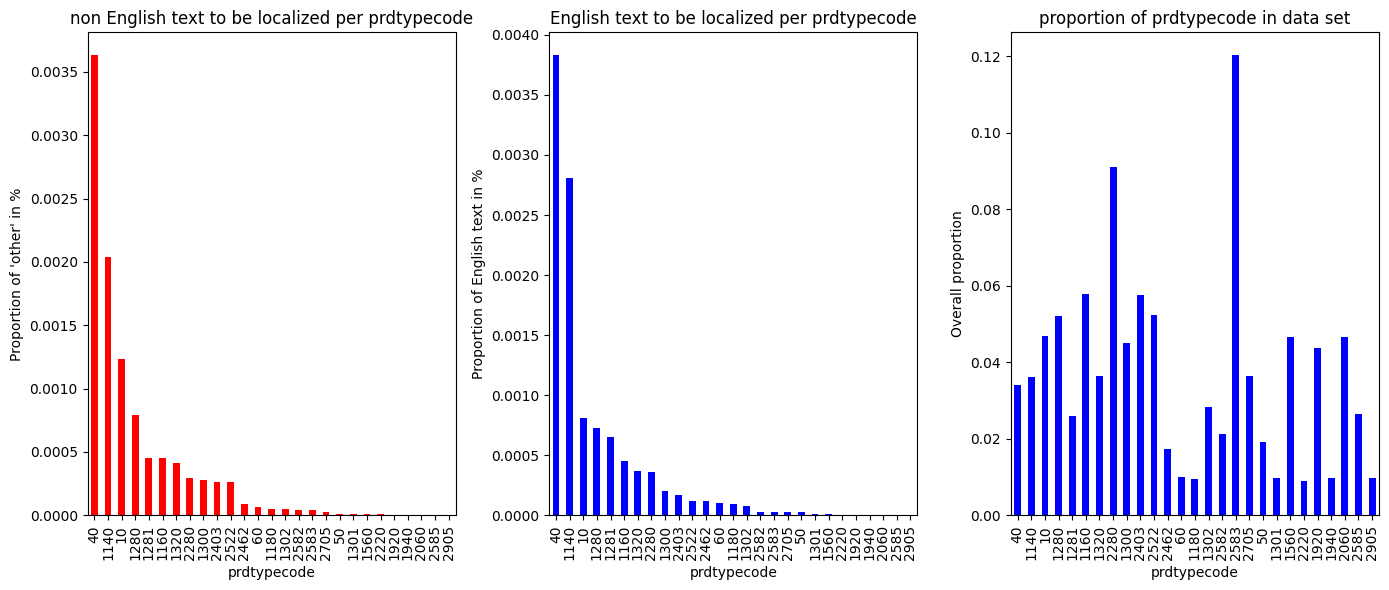

In [4]:
import matplotlib.pyplot as plt 
freq_counts = pd.crosstab(df_translate['prdtypecode'], df_translate.loc[df_translate['deepL_translation'].isna()]['lang'].apply(lambda x: x if x in ['fr', 'en'] else 'other'), normalize=True)

# Compute "other" proportion per prdtypecode
other_freq = freq_counts['other'].sort_values(ascending=False)

en_freq = freq_counts['en'].sort_values(ascending=False)

# Compute overall proportion of each prdtypecode
overall_freq = df_translate['prdtypecode'].value_counts(normalize=True)

# Reindex `overall_freq` to match the order of `other_freq`
overall_freq = overall_freq.reindex(other_freq.index, fill_value=0)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 3, figsize=(14, 6), sharex=True)

# Plot proportion of "other" per prdtypecode
other_freq.plot(kind="bar", color="red", ax=axes[0])
axes[0].set_title("non English text to be localized per prdtypecode")
axes[0].set_xlabel("prdtypecode")
axes[0].set_ylabel("Proportion of 'other' in %")

# Plot overall proportion of each prdtypecode (same order)
en_freq.plot(kind="bar", color="blue", ax=axes[1])
axes[1].set_title("English text to be localized per prdtypecode")
axes[1].set_xlabel("prdtypecode")
axes[1].set_ylabel("Proportion of English text in %")

# Plot overall proportion of each prdtypecode (same order)
overall_freq.plot(kind="bar", color="blue", ax=axes[2])
axes[2].set_title("proportion of prdtypecode in data set")
axes[2].set_xlabel("prdtypecode")
axes[2].set_ylabel("Overall proportion")

# Adjust layout
plt.tight_layout()
plt.show();

### Calling the DeepL API

The DeepL documentation used for this can be found https://developers.deepl.com/docs/getting-started/your-first-api-request

In [5]:
try:
    df_translate = loc_utils.apply_translation_conditionally_in_chunks(df_translate, chunk_size=200)
    df_translate.to_csv(loc_utils.deepl_file, index=False)
    print('{loc_utils.deepl_file} was updated')
except Exception as e:
    df_deepL_output = pd.read_csv(loc_utils.deepl_output_file).drop_duplicates()
    df_translate.combine_first(df_deepL_output).to_csv(loc_utils.deepl_file, index = False)
    print(f'using API KEY {loc_utils.auth_key} \n Error: {e} \n\
          updating {loc_utils.deepl_file} from {loc_utils.deepl_output_file}')
    


0it [00:00, ?it/s]

85340 rows left to run


0it [00:00, ?it/s]

85140 rows left to run


0it [00:00, ?it/s]

84940 rows left to run


0it [00:00, ?it/s]

84740 rows left to run


0it [00:00, ?it/s]

84540 rows left to run


0it [00:00, ?it/s]

84340 rows left to run


0it [00:00, ?it/s]

84140 rows left to run


0it [00:00, ?it/s]

83940 rows left to run


0it [00:00, ?it/s]

83740 rows left to run


0it [00:00, ?it/s]

83540 rows left to run


0it [00:00, ?it/s]

83340 rows left to run


0it [00:00, ?it/s]

83140 rows left to run


0it [00:00, ?it/s]

82940 rows left to run


0it [00:00, ?it/s]

82740 rows left to run


0it [00:00, ?it/s]

82540 rows left to run


0it [00:00, ?it/s]

82340 rows left to run


0it [00:00, ?it/s]

82140 rows left to run


0it [00:00, ?it/s]

81940 rows left to run


0it [00:00, ?it/s]

81740 rows left to run


0it [00:00, ?it/s]

81540 rows left to run


0it [00:00, ?it/s]

81340 rows left to run


0it [00:00, ?it/s]

81140 rows left to run


0it [00:00, ?it/s]

80940 rows left to run


0it [00:00, ?it/s]

80740 rows left to run


0it [00:00, ?it/s]

80540 rows left to run


0it [00:00, ?it/s]

80340 rows left to run


0it [00:00, ?it/s]

80140 rows left to run


0it [00:00, ?it/s]

79940 rows left to run


0it [00:00, ?it/s]

79740 rows left to run


0it [00:00, ?it/s]

79540 rows left to run


0it [00:00, ?it/s]

79340 rows left to run


0it [00:00, ?it/s]

79140 rows left to run


0it [00:00, ?it/s]

78940 rows left to run


0it [00:00, ?it/s]

78740 rows left to run


0it [00:00, ?it/s]

78540 rows left to run


0it [00:00, ?it/s]

78340 rows left to run


0it [00:00, ?it/s]

78140 rows left to run


0it [00:00, ?it/s]

77940 rows left to run


0it [00:00, ?it/s]

77740 rows left to run


0it [00:00, ?it/s]

77540 rows left to run


0it [00:00, ?it/s]

77340 rows left to run


0it [00:00, ?it/s]

77140 rows left to run


0it [00:00, ?it/s]

76940 rows left to run


0it [00:00, ?it/s]

76740 rows left to run


0it [00:00, ?it/s]

76540 rows left to run


0it [00:00, ?it/s]

76340 rows left to run


0it [00:00, ?it/s]

76140 rows left to run


0it [00:00, ?it/s]

75940 rows left to run


0it [00:00, ?it/s]

75740 rows left to run


0it [00:00, ?it/s]

75540 rows left to run


0it [00:00, ?it/s]

75340 rows left to run


0it [00:00, ?it/s]

75140 rows left to run


0it [00:00, ?it/s]

74940 rows left to run


0it [00:00, ?it/s]

74740 rows left to run


0it [00:00, ?it/s]

74540 rows left to run


0it [00:00, ?it/s]

74340 rows left to run


0it [00:00, ?it/s]

74140 rows left to run


  0%|          | 0/1 [00:00<?, ?it/s]

using API KEY 2ed5c008-0933-4855-a4c7-b9bb8095a7c9:fx 
 Error: Quota for this billing period has been exceeded, message: Quota Exceeded 
          updating language_analysis/df_localization.csv from language_analysis/deepL_result.csv
